In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [13]:
data.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [66]:
from sklearn.model_selection import train_test_split


X = data.drop('class', axis = 1)
y = data['class']

from sklearn.impute import SimpleImputer

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

MyImputer = SimpleImputer(missing_values = 0, strategy = 'mean')


columns = x_train.columns 

x_train = pd.DataFrame(MyImputer.fit_transform(x_train))
x_test = pd.DataFrame(MyImputer.fit_transform(x_test))

x_train.columns = columns
x_test.columns = columns
x_test.head()



,Preg,Plas,Pres,skin,test,mass,pedi,age
0,7.0,136.0,74.0,26.000000,135.000000,26.0,0.647,51.0
1,1.0,151.0,60.0,30.525424,148.348837,26.1,0.179,22.0
2,6.0,109.0,60.0,27.000000,148.348837,25.0,0.206,27.0
3,3.0,61.0,82.0,28.000000,148.348837,34.4,0.243,46.0
4,1.0,116.0,78.0,29.000000,180.000000,36.1,0.496,25.0


In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
 
MyBayes = GaussianNB()
MyBayes.fit(x_train,y_train)



print('The accuracy score of my model in training is: {}'.format(metrics.accuracy_score(y_train,MyBayes.predict(x_train))))


The accuracy score of my model in training is: 0.750814332247557


In [68]:
print('The accuracy score of my model in testing is: {}'.format(metrics.accuracy_score(y_test,MyBayes.predict(x_test))))

The accuracy score of my model in testing is: 0.7662337662337663


## Looks like the accuracy score of my model is greater during testing than in training.That 
## means that we have underfitting since the model performs relatively poorly in training

<AxesSubplot:>

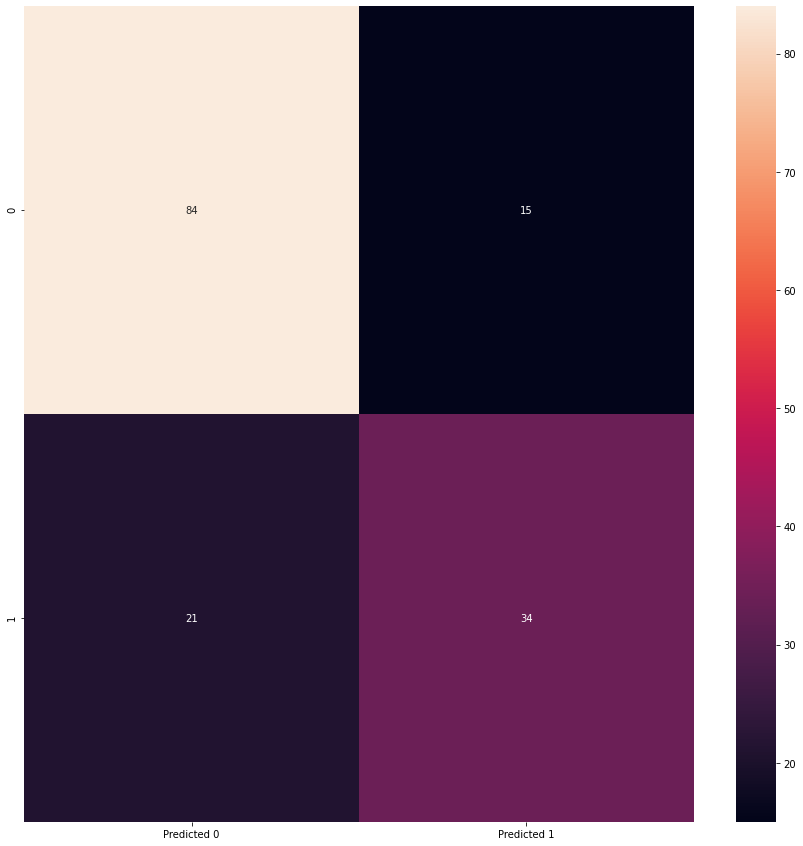

In [70]:
predict = MyBayes.predict(x_test)

confusion_matrix = metrics.confusion_matrix(y_test,predict)


DataFrameUltimateMatrix = pd.DataFrame(confusion_matrix, index = ['0','1'], columns = ['Predicted 0','Predicted 1'])


plt.figure(figsize = (15,15))
sns.heatmap(DataFrameUltimateMatrix,annot = True)

## According to our matrix we have predicted correctly 84/105 cases of non-diabetics and 34/49 of diabetics.
## Unfortunately,given the importance of high accuracy in the medical industry,this is not good enough.

In [65]:
print("Classification Report")
print(metrics.classification_report(y_test,predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

